In [54]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

import matplotlib.animation as animation
import glob, re

import scienceplots

plt.style.use('default')
plt.style.use(['science', 'high-vis', 'grid'])

In [55]:
# Get lastly created folder in a directory
def get_last_folder(dir):
    list_of_subfolders = [f.path for f in os.scandir(dir) if f.is_dir()]
    latest_subfolder = max(list_of_subfolders, key=os.path.getmtime)
    return latest_subfolder

In [56]:
PSO_DIR = get_last_folder("../build/results_pso/")
SA_DIR = get_last_folder("../build/results_sa/")

file_spad_figures_PSO = f"{PSO_DIR}/BEST/SPAD_figures_best_path.csv"
file_spad_figures_SA = f"{SA_DIR}/BEST/SPAD_figures_best_path.csv"

In [57]:
Iteration_PSO, BV_PSO, BrP_PSO, DW_PSO, Cost_PSO = np.loadtxt(file_spad_figures_PSO, delimiter=',', unpack=True, skiprows=1)
Iteration_SA, BV_SA, BrP_SA, DW_SA, Cost_SA = np.loadtxt(file_spad_figures_SA, delimiter=',', unpack=True, skiprows=1)

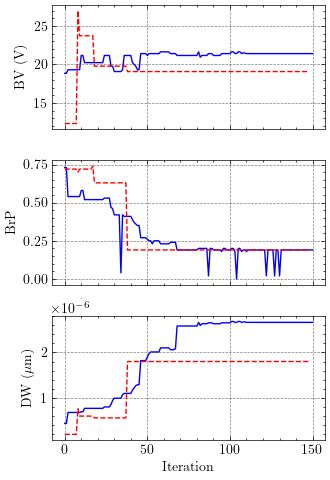

In [58]:
fig, ax = plt.subplots(3, 1, figsize=(3.5, 5), sharex=True)

ax[0].set_ylabel('BV (V)')
ax[1].set_ylabel('BrP')
ax[2].set_ylabel('DW ($\mu$m)')
ax[2].set_xlabel('Iteration')

ax[0].plot(Iteration_PSO, BV_PSO, color='b')
ax[1].plot(Iteration_PSO, BrP_PSO, color='b')
ax[2].plot(Iteration_PSO, DW_PSO, color='b')

ax[0].plot(Iteration_SA, BV_SA, color='r')
ax[1].plot(Iteration_SA, BrP_SA, color='r')
ax[2].plot(Iteration_SA, DW_SA, color='r')


fig.tight_layout()

fig.savefig('/home/remi/Papers/IWCN23/figuresiter.pdf', dpi=300)